# Homework 01: Python Practice

### Ana Belen Barcenas J.

This is meant to get you up to speed with the level of skill in Python that we expect for BIOS 823. You can use online resources, but avoid copy and paste as you will not learn that way. Instead, try to understand the reference/tutorial/example found, then close the browser and try to re-code it yourself.

**1**. (25 points)

In this exercise, we will practice using Pandas dataframes to explore and summarize a data set `heart`.

This data contains the survival time after receiving a heart transplant, the age of the patient and whether or not the survival time was censored

- Number of Observations - 69
- Number of Variables - 3

Variable name definitions::

- survival - Days after surgery until death
- censors - indicates if an observation is censored. 1 is uncensored
- age - age at the time of surgery

Answer the following questions (5 points each) with respect to the `heart` data set:

- How many patients were censored?
- What is the correlation coefficient between age and survival for uncensored patients? 
- What is the average age for censored and uncensored patients?
- What is the average survival time for censored and uncensored patients under the age of 45?
- What is the survival time of the youngest and oldest uncensored patient?



In [2]:
import statsmodels.api as sm
heart = sm.datasets.heart.load_pandas().data
heart

,survival,censors,age
0,15.0,1.0,54.3
1,3.0,1.0,40.4
2,624.0,1.0,51.0
3,46.0,1.0,42.5
4,127.0,1.0,48.0
...,...,...,...
64,14.0,1.0,40.3
65,167.0,0.0,26.7
66,110.0,0.0,23.7
67,13.0,0.0,28.9


***1.1*** How many patients were censored? 

Answer: 24

In [5]:
heart[heart.censors == 0]['censors'].count()

24

In [26]:
heart[heart.censors == 0]['censors'].count()

24

***1.2*** What is the correlation coefficient between age and survival for uncensored patients?

Answer: 0.003

In [16]:
heart[heart.censors == 1]['age'].corr(heart[heart.censors == 1]['survival'])

0.00325649928321193

***1.3*** What is the average age for censored and uncensored patients?

Answer:

Uncensored: 48.5 / Censored: 41.7

In [20]:
heart[heart.censors == 1]['age'].mean()

48.484444444444456

In [21]:
heart[heart.censors == 0]['age'].mean()

41.729166666666664

***1.4*** What is the average survival time for censored and uncensored patients under the age of 45?

Answer:

Uncensored: 169.9 / Censored: 712.8

In [28]:
heart[(heart.censors == 1) & (heart.age < 45)]['survival'].mean()

169.9090909090909

In [29]:
heart[(heart.censors == 0) & (heart.age < 45)]['survival'].mean()

712.8181818181819

***1.5*** What is the survival time of the youngest and oldest uncensored patient?

Answer:

Survival time of the youngest: 60 / Oldest: 228

In [27]:
heart[(heart.censors == 1) & (heart.age == min(heart[heart.censors == 1].age))]

,survival,censors,age
41,228.0,1.0,19.7


In [28]:
heart[(heart.censors == 1) & (heart.age == max(heart[heart.censors == 1].age))]

,survival,censors,age
17,60.0,1.0,64.5


**2**. (25 points)

Build a predictive model to guess the species of an iris flower by its measurements. Split the data set provided into 2/3 training and 1/3 test examples using a random splitting strategy. Fit a `sklearn.neighbors.KNeighborsClassifier` to the training data (you can use the default parameters). Generate the $3 \times 3$ confusion matrix for the model evaluated on the test data.

In [6]:
from sklearn import datasets
iris = datasets.load_iris()
iris.keys()

dict_keys(['data', 'target', 'target_names', 'DESCR', 'feature_names'])

In [8]:
iris.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [10]:
type(iris.data)

numpy.ndarray

In [11]:
from sklearn.model_selection import train_test_split

# Split data: 2/3 training sample, 1/3 test sample
X_train, X_test, y_train, y_test = train_test_split(iris.data, iris.target, test_size = 1/3, random_state = 0)

In [81]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics

# Instantiate and fit classifier to training dataset
clrKN = KNeighborsClassifier().fit(X_train, y_train)
# Predict species from test set
pred_KN = clrKN.predict(X_test)

# Confusion matrix
cm = metrics.confusion_matrix(y_test, pred_KN)
print("Confusion Matrix:")
print(cm)

# More detailed performance metrics
species = ['setosa', 'versicolor', 'virginica']
print("Classification report:")
print(classification_report(y_test, pred_KN, target_names=species))

Confusion Matrix:
[[16  0  0]
 [ 0 18  1]
 [ 0  0 15]]
Classification report:
             precision    recall  f1-score   support

     setosa       1.00      1.00      1.00        16
 versicolor       1.00      0.95      0.97        19
  virginica       0.94      1.00      0.97        15

avg / total       0.98      0.98      0.98        50



**3**. (50 points)

Write code to generate a plot similar to those shown below using the explanation for generation of 1D Cellular Automata found [here](http://mathworld.wolfram.com/ElementaryCellularAutomaton.html). You should only need to use standard Python, `numpy` and `matplotllib`.

![automata](http://mathworld.wolfram.com/images/eps-gif/ElementaryCA_850.gif)



The input to the function making the plots should be a simple list of rules

```python
rules = [30, 54, 60, 62, 90, 94, 102, 110, 122, 126, 
         150, 158, 182, 188, 190, 220, 222, 250]
make_plots(rules, niter, ncols)
```

You may, of course, write other helper functions to keep your code modular.

A plotting function is provided so you only need to code the two functions above.

In [16]:
import numpy as np
import matplotlib
from matplotlib.ticker import NullFormatter, IndexLocator
import matplotlib.pyplot as plt

# First let's define a function that generates the evolution of each different rule given a rule number: rule_num
def rule_generator(rule_num):
    bin_number = format(rule_num, '08b')
    dic = {}
    base = ["111","110","101","100","011","010","001","000"]
    for i in range(0,8):
        dic[base[i]] = int(bin_number[i])
    return dic

# Now, let's create a function that generates a grid based on a rule's dictionary defined previously
def grid_generator(dic):
    grid = np.zeros((20,41))
    grid[0][21] = 1
    
    for i in range(0,len(grid)):
        for j in range(0,len(grid[0])):
            if j==0:
                pattern = str(int(grid[i][len(grid[0])-1]))+str(int(grid[i][0]))+str(int(grid[i][1]))
            elif j==(len(grid[0])-1):
                pattern = str(int(grid[i][len(grid[0])-2]))+str(int(grid[i][len(grid[0])-1]))+str(int(grid[i][0]))
            else:
                pattern = str(int(grid[i][j-1]))+str(int(grid[i][j]))+str(int(grid[i][j+1]))

            if i<(len(grid)-1):
                value = dic[pattern]
                grid[i+1][j] = value
    
    return grid

In [21]:
%matplotlib inline
from matplotlib.ticker import NullFormatter, IndexLocator
import matplotlib.pyplot as plt

def plot_grid(loc, rule, grid, ax=None):
    if ax is None:
        ax = plt.subplot(1,3,(loc%3)+1)
    with plt.style.context('seaborn-white'):
        ax.grid(True, which='major', color='grey', linewidth=0.5)
        ax.imshow(grid, interpolation='none', cmap='Greys', aspect=1, alpha=0.8)
        ax.xaxis.set_major_locator(IndexLocator(1, 0))
        ax.yaxis.set_major_locator(IndexLocator(1, 0))
        ax.xaxis.set_major_formatter( NullFormatter() )
        ax.yaxis.set_major_formatter( NullFormatter() )
        ax.set_title('Rule %d' % rule)
        

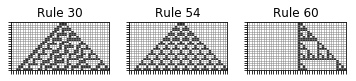

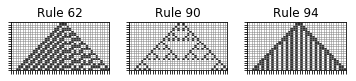

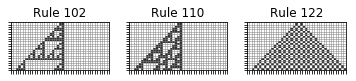

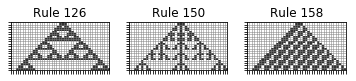

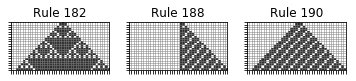

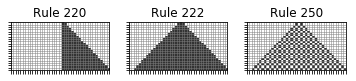

In [23]:
# Finally, let's plot the evolution of the following rules:

rules = [30, 54, 60, 62, 90, 94, 102, 110, 122, 126, 150, 158, 182, 188, 190, 220, 222, 250]

for j,i in enumerate(rules):
    dic = rule_generator(i)
    grid = grid_generator(dic)
    plot_grid(j,i,grid)
    if (j+1)%3==0:
        plt.show()
            